In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

In [3]:
sim = Simulator(num_observations=2000, num_features=100,)
sim.generate_sample_description(num_batches=0, num_confounders=2)
# sample parameters from positive truncated N(1, 0.1)
mu=1; phi=0.1
sim.generate_params(rand_fn_loc=lambda size: mu + scipy.stats.truncnorm.rvs(-mu / phi, np.infty, scale=phi, size=size))
#sim.generate_params(min_mean=0.1, max_mean=500, min_r=1, max_r=10)
sim.generate_data()

# count data
X = sim.X
# sample description
sample_description = sim.sample_description

The sample description should be a pandas DataFrame with `num_observations` rows.
Each column should represent a property of the dataset.

The module `batchglm.api.data` contains some helper functions which can be useful to create this sample description:

- `sample_description_from_anndata()`
- `sample_description_from_xarray()`

In [4]:
sample_description.iloc[:10,:]

,condition
observations,
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0


# Run differential expression test:

The wilcoxon test checks if two groups of samples differ significantly in one gene.

Therefore, it has to be provided with a parameter `grouping` which specifies the group membership of each sample.
It can be either the name of a column in `sample_description` or a vector of length `num_observations`.


In [5]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy.api as de

test = de.test.wilcoxon(
    data=X,
    grouping="condition",
    sample_description=sample_description
)

# Obtaining the results

The p-/q-values can be obtained by calling test.pval / test.qval:

In [6]:
test.qval

array([9.76863475e-01, 5.48614648e-05, 1.40407218e-03, 1.77817284e-01,
       1.75717825e-01, 6.75716233e-01, 5.30498020e-01, 1.85526334e-04,
       3.58101417e-03, 2.23741067e-01, 8.28369753e-42, 7.97894937e-05,
       3.35621641e-23, 6.19190755e-15, 6.79586470e-01, 6.82457234e-04,
       1.84016237e-01, 9.48635658e-38, 6.07263027e-01, 7.97894937e-05,
       2.48400358e-04, 5.56892421e-01, 5.05409520e-01, 3.21596899e-05,
       4.26011609e-01, 5.79328279e-04, 3.37234906e-01, 1.28477024e-10,
       3.07165991e-09, 5.04913727e-06, 3.58746051e-06, 1.12328563e-01,
       5.56314456e-01, 7.58423236e-04, 5.47551004e-10, 1.31551776e-03,
       4.00403589e-04, 8.86351657e-02, 2.70905840e-03, 2.31320688e-09,
       2.41193041e-58, 8.86038489e-02, 8.86038489e-02, 6.15924314e-01,
       5.50396309e-12, 2.48400358e-04, 1.41318735e-66, 2.41261294e-04,
       4.84164886e-03, 5.48506925e-06, 1.67772105e-38, 2.80727120e-01,
       1.52303578e-01, 8.97850765e-03, 9.45024408e-05, 3.53003899e-03,
      

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [7]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean
0,0,0.976863,0.976863,-0.041434,5262.5060
1,1,0.000020,0.000055,-0.096786,9752.8805
2,2,0.000786,0.001404,0.115717,6891.1125
3,3,0.138697,0.177817,0.001613,4475.1805
4,4,0.135303,0.175718,-0.006334,8048.7625
5,5,0.655445,0.675716,0.137631,2833.4830
6,6,0.488058,0.530498,-0.035251,7644.2700
7,7,0.000083,0.000186,-0.130320,868.6620
8,8,0.002149,0.003581,-0.111974,2673.1360
9,9,0.183468,0.223741,-0.001889,6783.4180


- `gene`: gene name / identifier
- `pval`: p-value of the gene
- `qval`: multiple testing - corrected p-value of the gene
- `log2fc`: log_2 fold change between `no coefficient` and `coefficient`

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c215065f8>)

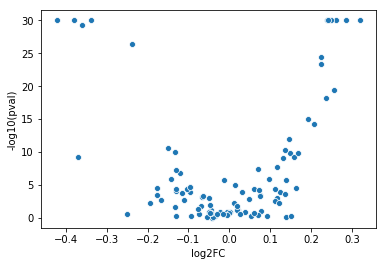

In [8]:
test.plot_volcano()

`plot_vs_ttest()` shows the correlation between t-test p-values and the wald test p-values

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c21598dd8>)

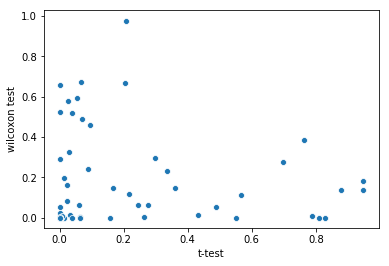

In [9]:
test.plot_vs_ttest()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

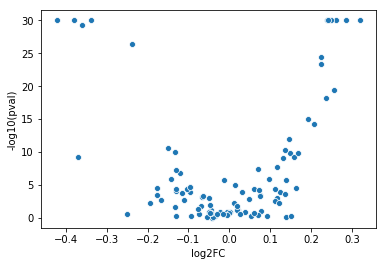

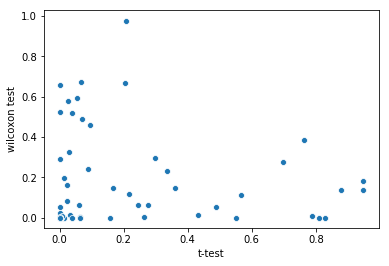

In [10]:
test.plot_diagnostics()